<a href="https://colab.research.google.com/github/devakarsuresh/zomato-project/blob/main/zomato_data_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  
                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No 

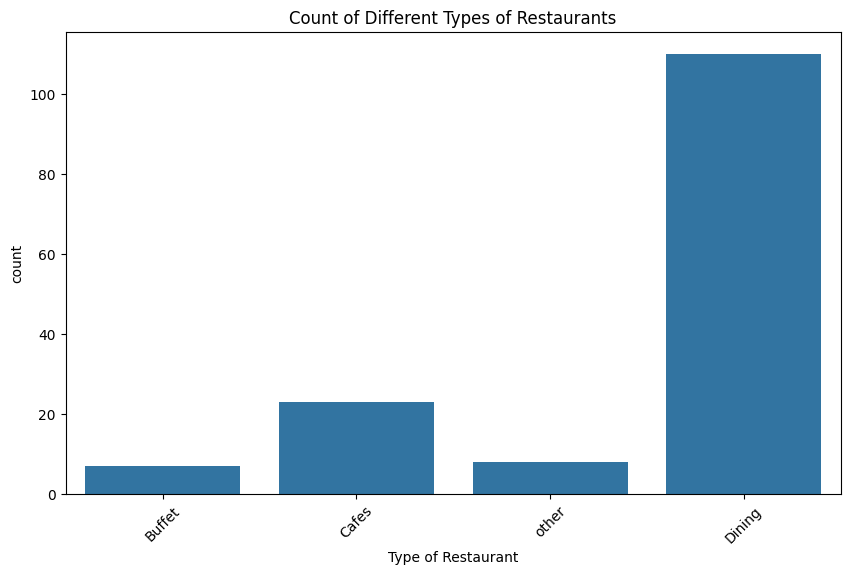

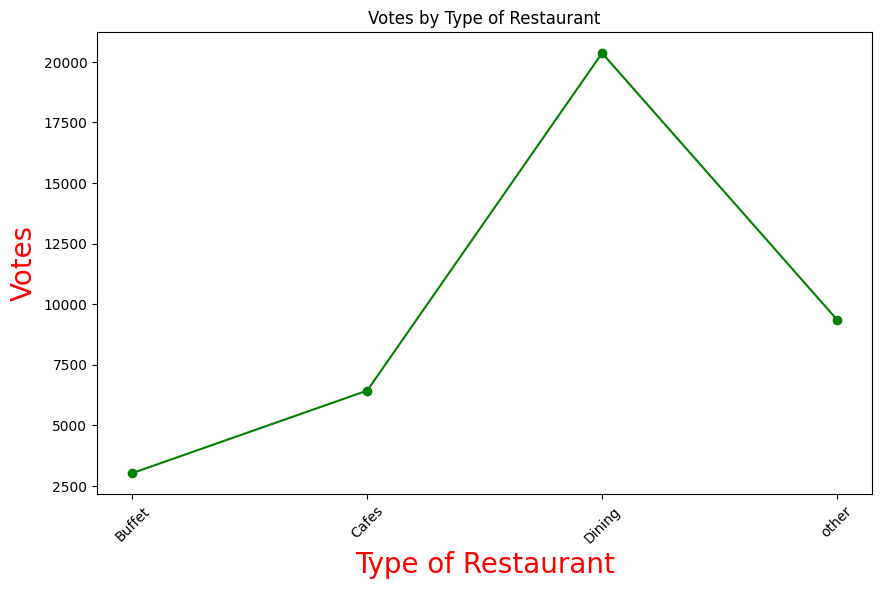

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


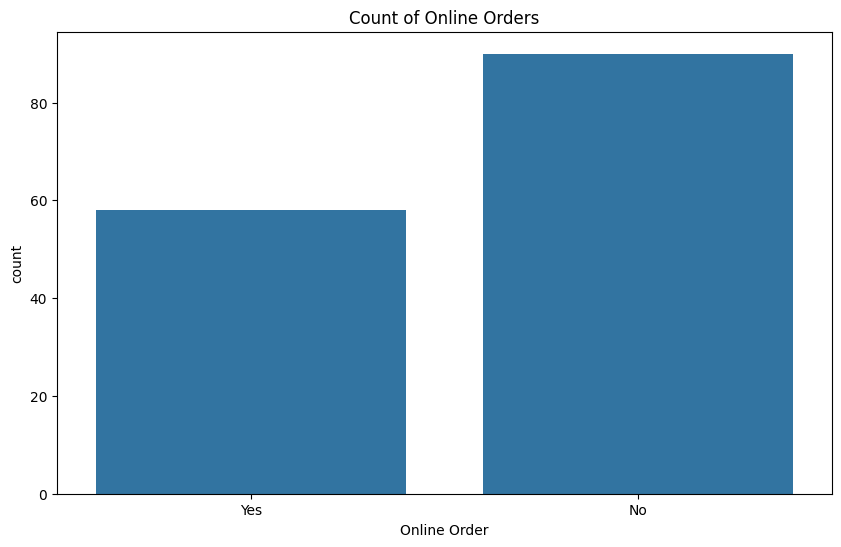

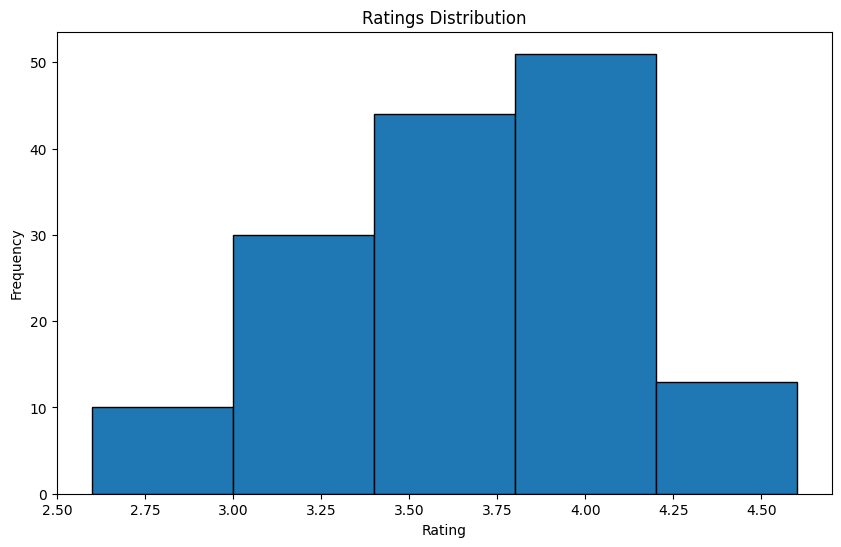

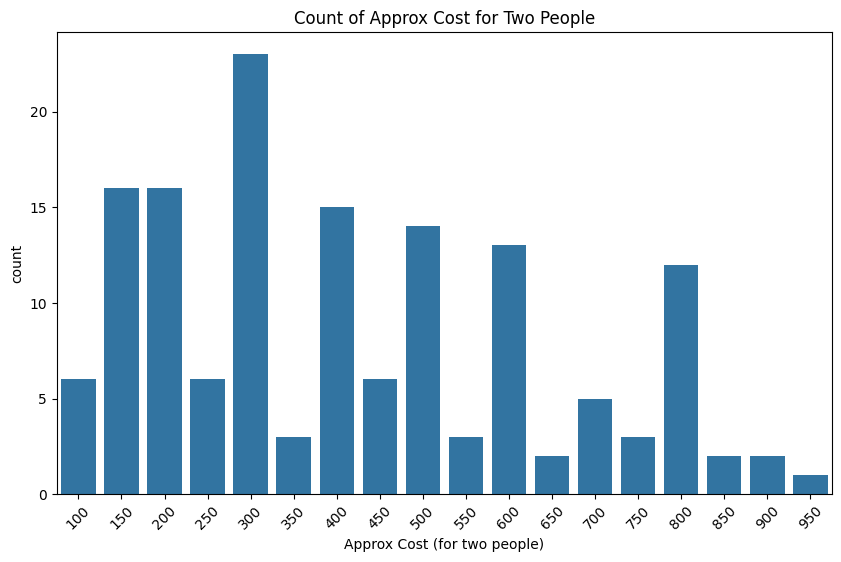

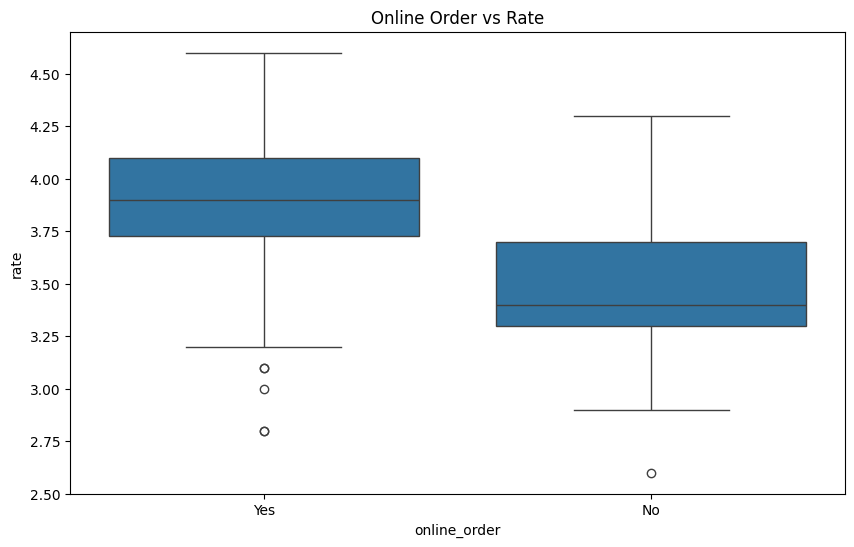

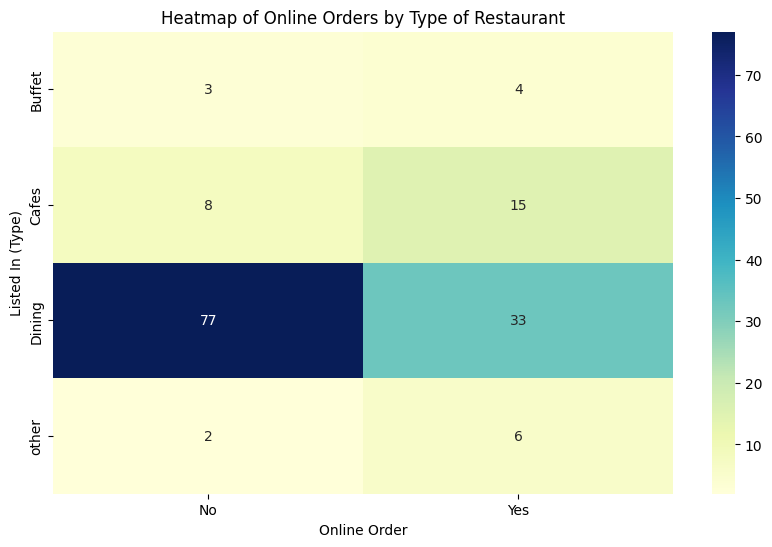

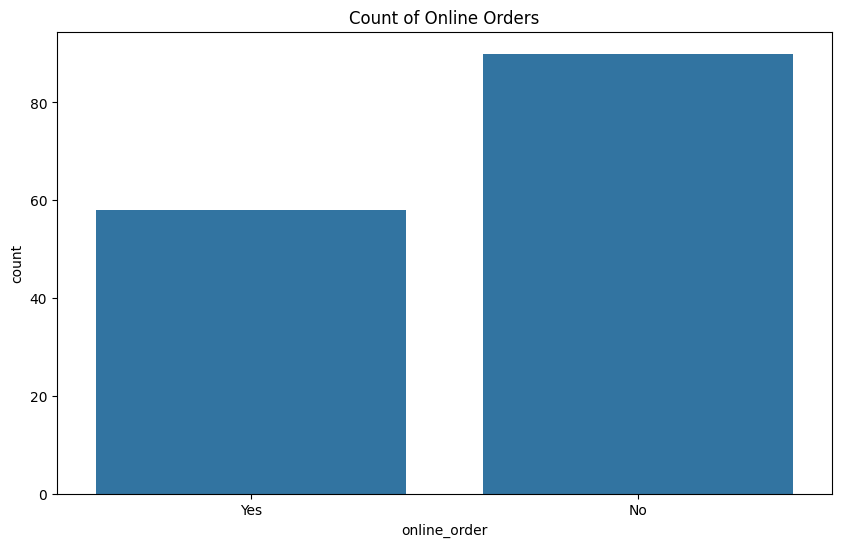

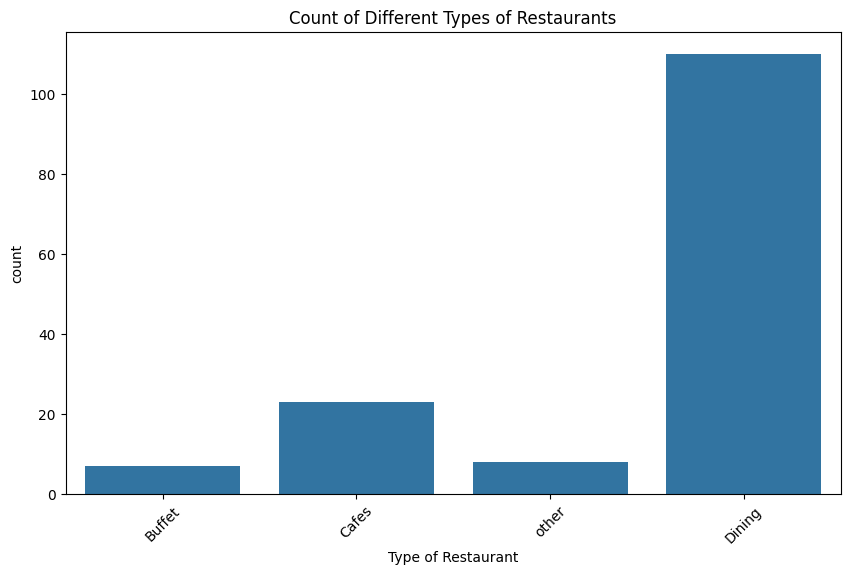

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataframe = pd.read_csv("/content/Zomato data .csv")  # Make sure to provide the correct path

# Display the first few rows of the dataframe
print(dataframe.head())

# Function to handle the 'rate' column
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

# Apply the function to the 'rate' column
dataframe['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe.head())

# Display dataframe information
dataframe.info()

# Plot the count of different types of restaurants
plt.figure(figsize=(10, 6))
sns.countplot(x='listed_in(type)', data=dataframe)
plt.xlabel("Type of Restaurant")
plt.title("Count of Different Types of Restaurants")
plt.xticks(rotation=45)
plt.show()

# Group by 'listed_in(type)' and sum the votes
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})

# Plot the votes by type of restaurant
plt.figure(figsize=(10, 6))
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of Restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)
plt.title("Votes by Type of Restaurant")
plt.xticks(rotation=45)
plt.show()

# Find the restaurant(s) with the maximum votes
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)

# Plot the count of online orders
plt.figure(figsize=(10, 6))
sns.countplot(x='online_order', data=dataframe)
plt.xlabel("Online Order")
plt.title("Count of Online Orders")
plt.show()

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
plt.hist(dataframe['rate'], bins=5, edgecolor='black')
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# Plot the count of approximate cost for two people
plt.figure(figsize=(10, 6))
sns.countplot(x='approx_cost(for two people)', data=dataframe)
plt.xlabel("Approx Cost (for two people)")
plt.title("Count of Approx Cost for Two People")
plt.xticks(rotation=45)
plt.show()

# Boxplot of online order vs rate
plt.figure(figsize=(10, 6))
sns.boxplot(x='online_order', y='rate', data=dataframe)
plt.title("Online Order vs Rate")
plt.show()

# Pivot table and heatmap
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap of Online Orders by Type of Restaurant")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

# Additional count plots
plt.figure(figsize=(10, 6))
sns.countplot(x='online_order', data=dataframe)
plt.title("Count of Online Orders")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='listed_in(type)', data=dataframe)
plt.xlabel("Type of Restaurant")
plt.title("Count of Different Types of Restaurants")
plt.xticks(rotation=45)
plt.show()
